Counts(ideal): {'000': 505, '111': 519}
Counts(noise): {'111': 418, '000': 410, '001': 75, '100': 22, '010': 17, '110': 61, '011': 14, '101': 7}
        ┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2 


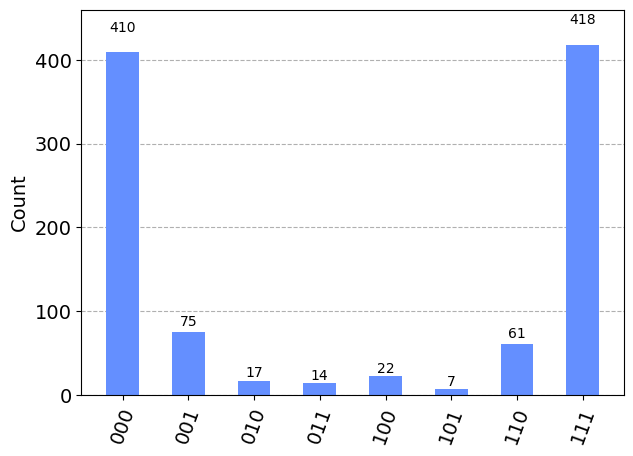

In [35]:
import qiskit
from qiskit_aer import AerSimulator
from qiskit.providers.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram


# Generate 3-qubit GHZ state (circuit)
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()

# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = aersim.run(circ).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)
# Counts(ideal): {'000': 493, '111': 531}

# Construct a noisy simulator backend from an IBMQ backend
# This simulator backend will be automatically configured
# using the device configuration and noise model
backend = FakeManilaV2()
aersim_backend = AerSimulator.from_backend(backend)


# Perform noisy simulation
result_noise = aersim_backend.run(circ).result()
counts_noise = result_noise.get_counts(0)

print('Counts(noise):', counts_noise)
# Counts(noise): {'101': 16, '110': 48, '100': 7, '001': 31, '010': 7, '000': 464, '011': 15, '111': 436}

print(circ)
circ.draw("mpl",style="iqp")
plot_histogram(counts_noise)
#plot_histogram(counts_ideal)
